In [1]:
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("DfTRoadSafety_Accidents_2014.csv")
#df.head(5)
df.head(5).T

,0,1,2,3,4
Accident_Index,201401BS70001,201401BS70002,201401BS70003,201401BS70004,201401BS70006
Location_Easting_OSGR,524600,525780,526880,525580,527040
Location_Northing_OSGR,179020,178290,178430,179080,179030
Longitude,-0.206443,-0.189713,-0.173827,-0.192311,-0.171308
Latitude,51.4963,51.4895,51.4905,51.4967,51.4959
Police_Force,1,1,1,1,1
Accident_Severity,3,3,3,3,3
Number_of_Vehicles,2,2,2,1,2
Number_of_Casualties,1,1,1,1,1
Date,09/01/2014,20/01/2014,21/01/2014,15/01/2014,09/01/2014


In [3]:
df.shape

(146322, 32)

In [4]:
# remove index
df.drop(["Accident_Index"], axis=1, inplace=True)
# drop blank columns
df.dropna(
    axis=1,
    how='all',
    inplace=True
)

# 1 . Exploratory data analysis

### Distribution independent

### Split date and time columns into Day, month, year and hour of day

In [5]:
# format Date in Datetime format and add additional columns for month, day, and hour
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# define function to convert to hourly time 
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(hour.hour)
    except Exception:
        return 0
df['Hour_of_Day'] = df['Time'].apply(to_hour)

### Traffic accident by month

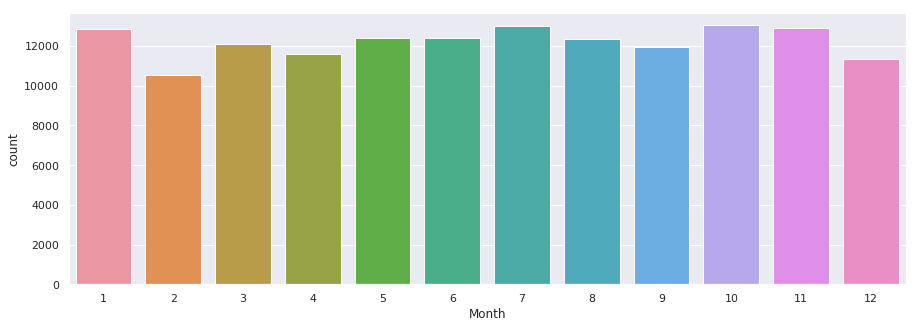

In [6]:
# df[["Month","Day"]]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="Month",data=df)

### Accident Severity by Month 

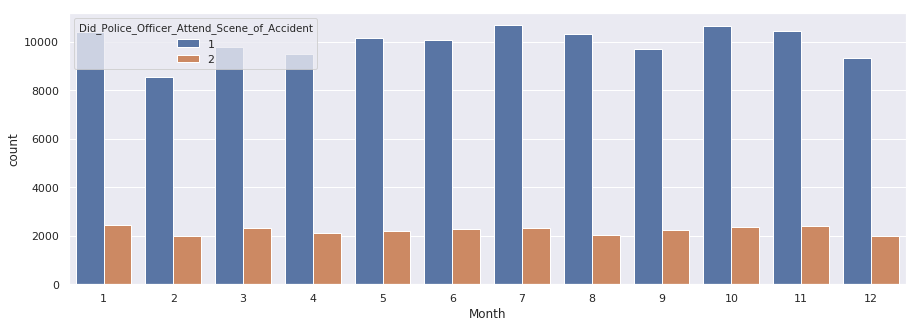

In [151]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="Month",hue="Did_Police_Officer_Attend_Scene_of_Accident",data=df)

### Traffic accidents by day of week and hour of week

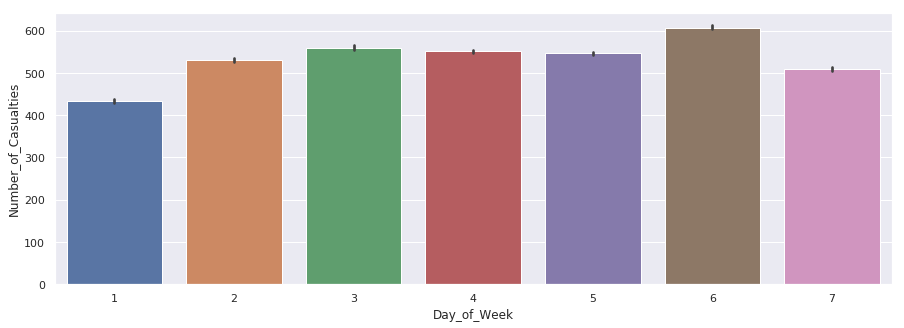

In [8]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x="Day_of_Week",y="Number_of_Casualties",estimator=lambda x: sum(x)/52,data=df)

### Number of Casualties distribution over hour of week

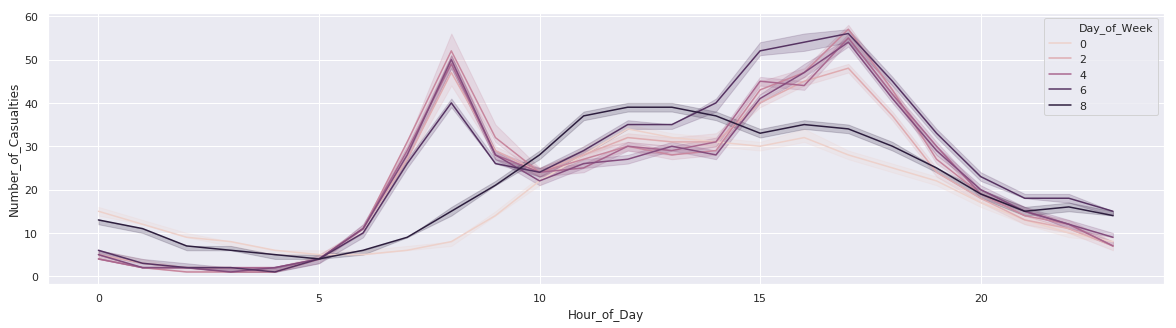

In [9]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(x="Hour_of_Day",y="Number_of_Casualties",hue="Day_of_Week",estimator=lambda x: sum(x)/52,data=df)

### Rural vs Urban (Urban_or_Rural_Area vs number of Casualties)

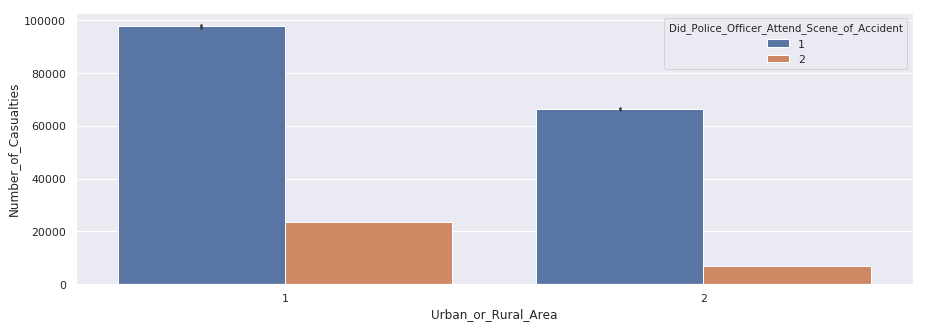

In [152]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x="Urban_or_Rural_Area",y="Number_of_Casualties",
            hue="Did_Police_Officer_Attend_Scene_of_Accident",estimator=lambda x: sum(x),data=df)

### Distribution by Road type and Urban_or_Rural_Area

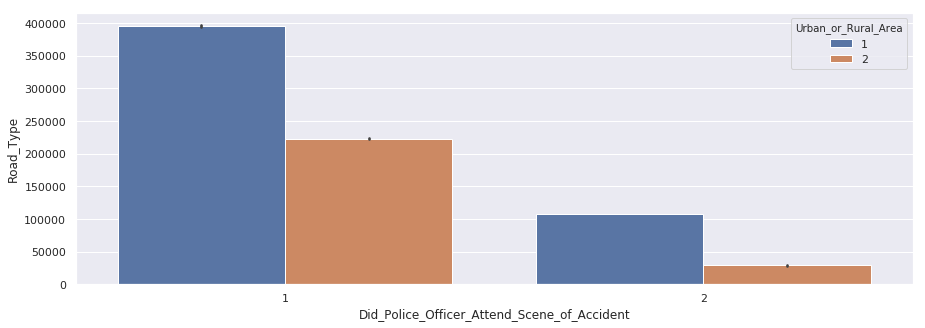

In [154]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(y="Road_Type",x="Did_Police_Officer_Attend_Scene_of_Accident",hue="Urban_or_Rural_Area",estimator=lambda x: sum(x),data=df)

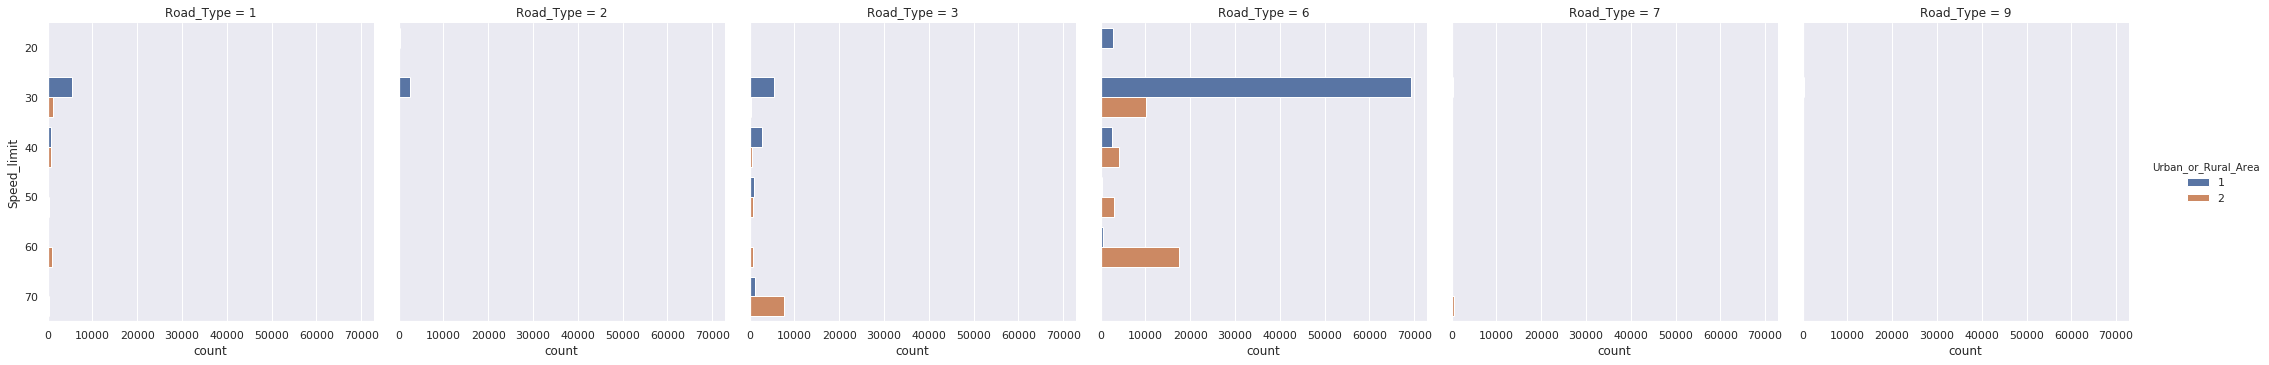

In [25]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.catplot(y="Speed_limit",kind='count',
            hue="Urban_or_Rural_Area",col="Road_Type",
            data=df)

### Weather condition vs Accident Severity 

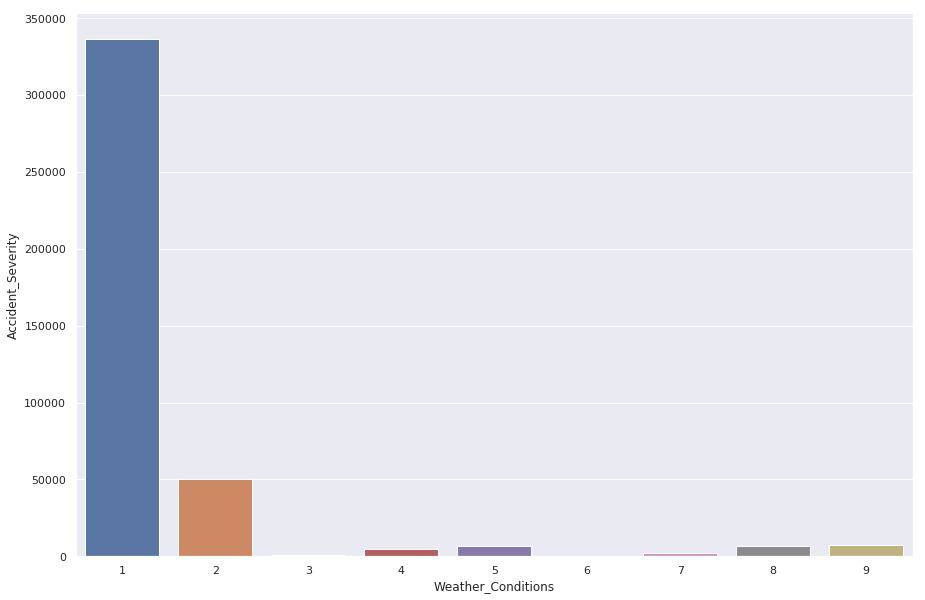

In [28]:
grouper_1 = df[['Weather_Conditions','Accident_Severity']]
weather_severity = grouper_1.groupby(by = 'Weather_Conditions',as_index=False).sum()
sns.barplot(weather_severity['Weather_Conditions'],weather_severity['Accident_Severity'])

### Location_Northing_OSGR distribution

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x="Location_Easting_OSGR",
            hue="Did_Police_Officer_Attend_Scene_of_Accident",
            estimator=lambda x: sum(x),data=df)

## Feature Engineering

In [5]:
object_columns = set(["Date","Time","Local_Authority_(Highway)","LSOA_of_Accident_Location"])
float64_columns = set(["Longitude","Latitude"])
int64_columns = set(df.columns)-object_columns-float64_columns
print("Object Columns :: ",object_columns)
print("float64 Columns :: ",float64_columns)
print("int64 Columns :: ",int64_columns)

('Object Columns :: ', set(['Date', 'LSOA_of_Accident_Location', 'Local_Authority_(Highway)', 'Time']))
('float64 Columns :: ', set(['Latitude', 'Longitude']))
('int64 Columns :: ', set(['Light_Conditions', 'Urban_or_Rural_Area', 'Number_of_Vehicles', 'Accident_Severity', 'Local_Authority_(District)', 'Location_Northing_OSGR', 'Speed_limit', 'Road_Type', 'Day_of_Week', '1st_Road_Class', 'Pedestrian_Crossing-Human_Control', 'Weather_Conditions', 'Junction_Control', 'Junction_Detail', 'Day', 'Police_Force', 'Pedestrian_Crossing-Physical_Facilities', '1st_Road_Number', 'Special_Conditions_at_Site', '2nd_Road_Class', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Number_of_Casualties', 'Carriageway_Hazards', 'Road_Surface_Conditions', '2nd_Road_Number', 'Hour_of_Day', 'Month', 'Location_Easting_OSGR']))


### Feature selection

In [ ]:
#Removing Features with low variance :: VarianceThreshold
#Univariate feature selection :-
#    |-> SelectKBest :: select best k features and removes others
#    |-> SelectPercentile :: 
#    |-> SelectFpr, SelectFdr, SelectFwe :: 
#    |-> GenericUnivariateSelect :: Univariate feature selector with configurable strategy
#Recursive feature elimination :: recursively eliminate feature based on feature_importance
#

### Apply information gain on int64 columns

In [6]:
from sklearn.feature_selection import mutual_info_classif
columnY = list(set(["Did_Police_Officer_Attend_Scene_of_Accident"]))
columnXint64 = list(int64_columns-set(columnY))
columnXfloat64 = list(float64_columns)
columnX = columnXint64 + columnXfloat64
information_gain = dict(zip(columnX,mutual_info_classif(df[columnX].values,df[columnY].values,
                                                        discrete_features=range(len(columnXint64)))))
information_gain

/shared/3QI_Release/dependencies/python_virtual_env_1/lib64/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'1st_Road_Class': 0.004798850776631537,
 '1st_Road_Number': 0.02666799216923231,
 '2nd_Road_Class': 0.0017544335093758832,
 '2nd_Road_Number': 0.016863434495980007,
 'Accident_Severity': 0.006924357192965774,
 'Carriageway_Hazards': 0.00023713600257160253,
 'Day': 0.00016391509720031783,
 'Day_of_Week': 0.0009264146983332389,
 'Hour_of_Day': 0.002904528975769383,
 'Junction_Control': 0.0008584157162301147,
 'Junction_Detail': 0.00299323099958056,
 'Latitude': 0.007525603382509516,
 'Light_Conditions': 0.00509551195324444,
 'Local_Authority_(District)': 0.01845758536791498,
 'Location_Easting_OSGR': 0.30988354454392625,
 'Location_Northing_OSGR': 0.32223750755374037,
 'Longitude': 0.00748033035118123,
 'Month': 0.00020463885446911356,
 'Number_of_Casualties': 0.008969410188794973,
 'Number_of_Vehicles': 0.007339209686418025,
 'Pedestrian_Crossing-Human_Control': 2.0718552493197324e-05,
 'Pedestrian_Crossing-Physical_Facilities': 0.0006909283169493283,
 'Police_Force': 0.011920848126283

In [6]:
df["Did_Police_Officer_Attend_Scene_of_Accident"].value_counts()

1    119607
2     26715
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

### Recursive Variable elimination
#### Eliminate variable inorder of increasing mutual information gain

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier 
results = []

def applyVariableElimination(df,columnY,clfClass=GradientBoostingClassifier,test_size=0.2):
    #initialize features columns and
    indexColumns = set(["Accident_Index"])
    columnY = list(set(columnY))
    object_columns = set(["Date","Time","Local_Authority_(Highway)","LSOA_of_Accident_Location",
                          "Location_Northing_OSGR","Location_Easting_OSGR"])
    float64_columns = set(["Longitude","Latitude"])
    int64_columns = set(df.columns)-indexColumns-object_columns-float64_columns
    columnXint64 = list(int64_columns-set(columnY))
    columnXfloat64 = list(float64_columns)
    #
    columnX = columnXint64 #+ columnXfloat64
    columnXEliminated = set([])
    results = []
    variableWithMinMutualInformationGain = ""
    for i in range(len(columnX)):
        resultsi = {}
        #1. update features to be used
        columnXi = list(set(columnX)-columnXEliminated)
        resultsi["FeaturesUsed"] = columnXi
        resultsi["OverAllFeaturesEliminated"] = columnXEliminated
        resultsi["FeatureEliminated"] = variableWithMinMutualInformationGain
        resultsi["UsedFeaturesCount"] = len(columnXi)
        #2. train test split
#         print(df[columnXi])
        X_train, X_test, y_train, y_test = train_test_split(df[columnXi].values,
                                                        df[columnY[0]].values.reshape(-1, 1),
                                                       test_size=test_size, random_state=42)
        #3. train
        clf = clfClass()
        clf = linear_model.SGDClassifier(alpha=0.0001, average=False, class_weight="balanced", epsilon=0.1,
                   eta0=0.01, fit_intercept=True, l1_ratio=0.15,penalty="elasticnet",
                   learning_rate='adaptive', loss='log', max_iter=1000, n_iter=None,
                   n_jobs=2, power_t=0.5, random_state=None,
                   shuffle=True, tol=None, verbose=1, warm_start=False)
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        resultsi["ScoreOnModel"] = balanced_accuracy_score(y_test,prediction)
        print(accuracy_score(y_test,prediction),resultsi["ScoreOnModel"],classification_report(y_test,prediction))
        break
        resultsi["ModelName"] = str(clfClass)

        #4. Update columnXEliminated
        ##get mutual information gain
        mutualInformationGaini = dict(zip(columnXi,mutual_info_classif(df[columnXi].values,df[columnY].values,
                                                        discrete_features=range(len(columnXi)))))
        resultsi["MutualInformationGain"] = mutualInformationGaini
        ##get variable with smallest mutual information gain
        variableWithMinMutualInformationGain = min(mutualInformationGaini.keys(), key=(lambda k: mutualInformationGaini[k]))
        columnXEliminated = set(list(columnXEliminated)+[variableWithMinMutualInformationGain])
        results.append(resultsi)
#         print(variableWithMinMutualInformationGain, len(columnXi),resultsi["ScoreOnModel"])
    
    return pd.DataFrame(results)
columnY  = ["Did_Police_Officer_Attend_Scene_of_Accident"]
df_GBClf = applyVariableElimination(df,columnY,clfClass=GradientBoostingClassifier,test_size=0.2)
# sns.lineplot(y="ScoreOnModel",x="UsedFeaturesCount",data=df_GBClf)
# df_GBClf

-- Epoch 1
Norm: 321.49, NNZs: 25, Bias: 18.251506, T: 117057, Avg. loss: 33926.513093
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 423.62, NNZs: 25, Bias: 31.509102, T: 234114, Avg. loss: 32906.100993
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 514.84, NNZs: 25, Bias: 42.637549, T: 351171, Avg. loss: 33319.866448
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 621.23, NNZs: 25, Bias: 54.311708, T: 468228, Avg. loss: 33087.821537
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 717.32, NNZs: 25, Bias: 64.704349, T: 585285, Avg. loss: 33064.164563
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 805.03, NNZs: 25, Bias: 74.742934, T: 702342, Avg. loss: 32918.413329
Total training time: 0.24 seconds.
-- Epoch 7
Norm: 880.38, NNZs: 25, Bias: 84.709703, T: 819399, Avg. loss: 33231.412577
Total training time: 0.28 seconds.
-- Epoch 8
Norm: 977.41, NNZs: 25, Bias: 94.535944, T: 936456, Avg. loss: 33429.736578
Total training time: 0.32 seconds.
-- Epoch 9
Norm: 1029.96

### For RandomForest

/shared/3QI_Release/dependencies/python_virtual_env_1/lib64/python2.7/site-packages/ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,FeatureEliminated,FeaturesUsed,ModelName,MutualInformationGain,OverAllFeaturesEliminated,ScoreOnModel,UsedFeaturesCount
0,,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'sklearn.ensemble.forest.RandomForestCl...,"{u'Light_Conditions': 0.00509551195324444, u'U...",{},0.814591,27
1,Hour_of_Day,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'sklearn.ensemble.forest.RandomForestCl...,"{u'Light_Conditions': 0.00509551195324444, u'U...",{Hour_of_Day},0.811755,26
2,Pedestrian_Crossing-Human_Control,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'sklearn.ensemble.forest.RandomForestCl...,"{u'Light_Conditions': 0.00509551195324444, u'U...","{Pedestrian_Crossing-Human_Control, Hour_of_Day}",0.814420,25
3,Day,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'sklearn.ensemble.forest.RandomForestCl...,"{u'Light_Conditions': 0.00509551195324444, u'U...","{Pedestrian_Crossing-Human_Control, Hour_of_Da...",0.811584,24
4,Month,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'sklearn.ensemble.forest.RandomForestCl...,"{u'Light_Conditions': 0.00509551195324444, u'U...","{Month, Pedestrian_Crossing-Human_Control, Hou...",0.808713,23
5,Carriageway_Hazards,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'sklearn.ensemble.forest.RandomForestCl...,"{u'Light_Conditions': 0.00509551195324444, u'U...","{Carriageway_Hazards, Day, Pedestrian_Crossing...",0.809397,22
6,Special_Conditions_at_Site,"[Road_Surface_Conditions, Light_Conditions, Ur...",<class 'sklearn.ensemble.forest.RandomForestCl...,{u'Road_Surface_Conditions': 0.004837696533510...,"{Pedestrian_Crossing-Human_Control, Special_Co...",0.809260,21
7,Pedestrian_Crossing-Physical_Facilities,"[Road_Surface_Conditions, Light_Conditions, Ur...",<class 'sklearn.ensemble.forest.RandomForestCl...,{u'Road_Surface_Conditions': 0.004837696533510...,"{Pedestrian_Crossing-Human_Control, Special_Co...",0.806390,20
8,Junction_Control,"[Road_Surface_Conditions, Light_Conditions, Ur...",<class 'sklearn.ensemble.forest.RandomForestCl...,{u'Road_Surface_Conditions': 0.004837696533510...,"{Pedestrian_Crossing-Human_Control, Special_Co...",0.806492,19
9,Day_of_Week,"[Road_Surface_Conditions, Light_Conditions, Ur...",<class 'sklearn.ensemble.forest.RandomForestCl...,{u'Road_Surface_Conditions': 0.004837696533510...,"{Pedestrian_Crossing-Human_Control, Special_Co...",0.803827,18


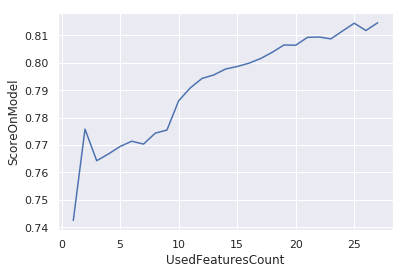

In [146]:
from sklearn.ensemble import RandomForestClassifier
columnY  = ["Did_Police_Officer_Attend_Scene_of_Accident"]
df_RFClf = applyVariableElimination(df,columnY,clfClass=RandomForestClassifier,test_size=0.2)
sns.lineplot(y="ScoreOnModel",x="UsedFeaturesCount",data=df_RFClf)
df_RFClf

#### For XGBoost

In [148]:
from xgboost import XGBClassifier
XGBClassifier()

,FeatureEliminated,FeaturesUsed,ModelName,MutualInformationGain,OverAllFeaturesEliminated,ScoreOnModel,UsedFeaturesCount
0,,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'xgboost.sklearn.XGBClassifier'>,"{u'Light_Conditions': 0.00509551195324444, u'U...",{},0.823543,27
1,Hour_of_Day,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'xgboost.sklearn.XGBClassifier'>,"{u'Light_Conditions': 0.00509551195324444, u'U...",{Hour_of_Day},0.823543,26
2,Pedestrian_Crossing-Human_Control,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'xgboost.sklearn.XGBClassifier'>,"{u'Light_Conditions': 0.00509551195324444, u'U...","{Pedestrian_Crossing-Human_Control, Hour_of_Day}",0.823543,25
3,Day,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'xgboost.sklearn.XGBClassifier'>,"{u'Light_Conditions': 0.00509551195324444, u'U...","{Pedestrian_Crossing-Human_Control, Hour_of_Da...",0.823543,24
4,Month,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'xgboost.sklearn.XGBClassifier'>,"{u'Light_Conditions': 0.00509551195324444, u'U...","{Month, Pedestrian_Crossing-Human_Control, Hou...",0.823509,23
5,Carriageway_Hazards,"[Light_Conditions, Urban_or_Rural_Area, Number...",<class 'xgboost.sklearn.XGBClassifier'>,"{u'Light_Conditions': 0.00509551195324444, u'U...","{Carriageway_Hazards, Day, Pedestrian_Crossing...",0.823475,22
6,Special_Conditions_at_Site,"[Road_Surface_Conditions, Light_Conditions, Ur...",<class 'xgboost.sklearn.XGBClassifier'>,{u'Road_Surface_Conditions': 0.004837696533510...,"{Pedestrian_Crossing-Human_Control, Special_Co...",0.823509,21
7,Pedestrian_Crossing-Physical_Facilities,"[Road_Surface_Conditions, Light_Conditions, Ur...",<class 'xgboost.sklearn.XGBClassifier'>,{u'Road_Surface_Conditions': 0.004837696533510...,"{Pedestrian_Crossing-Human_Control, Special_Co...",0.823578,20
8,Junction_Control,"[Road_Surface_Conditions, Light_Conditions, Ur...",<class 'xgboost.sklearn.XGBClassifier'>,{u'Road_Surface_Conditions': 0.004837696533510...,"{Pedestrian_Crossing-Human_Control, Special_Co...",0.823612,19
9,Day_of_Week,"[Road_Surface_Conditions, Light_Conditions, Ur...",<class 'xgboost.sklearn.XGBClassifier'>,{u'Road_Surface_Conditions': 0.004837696533510...,"{Pedestrian_Crossing-Human_Control, Special_Co...",0.823475,18


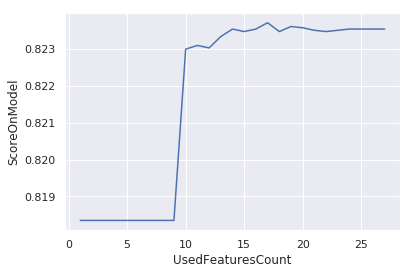

In [150]:
from xgboost import XGBClassifier 
columnY  = ["Did_Police_Officer_Attend_Scene_of_Accident"]
df_XGBClf = applyVariableElimination(df,columnY,clfClass=XGBClassifier,test_size=0.2)
sns.lineplot(y="ScoreOnModel",x="UsedFeaturesCount",data=df_XGBClf)
df_XGBClf

In [57]:
print(np.mean(information_gain.values()),np.std(information_gain.values()))

(0.027713228944947897, 0.07874213606506936)


<BarContainer object of 29 artists>

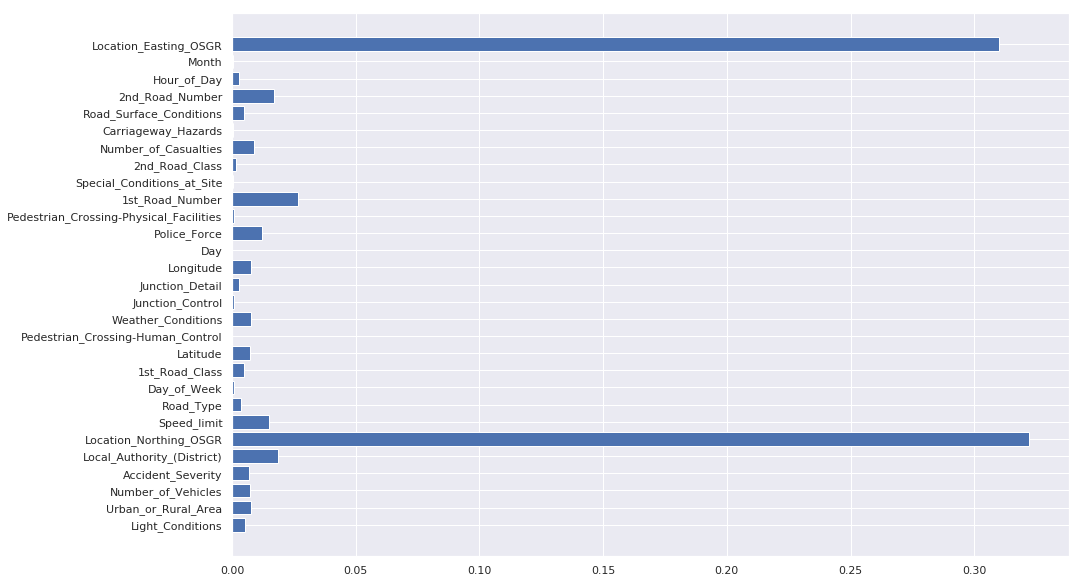

In [69]:
plt.barh(information_gain.keys(),information_gain.values())

In [71]:
information_gain_01 = {k:information_gain[k] for k in information_gain if information_gain[k]>0.01}
print(information_gain_01)

{'1st_Road_Number': 0.02666799216923231, 'Local_Authority_(District)': 0.01845758536791498, 'Location_Northing_OSGR': 0.32223750755374037, 'Speed_limit': 0.014808648370867001, 'Location_Easting_OSGR': 0.30988354454392625, '2nd_Road_Number': 0.016863434495980007, 'Police_Force': 0.011920848126283396}


### Train model

#### Model 1: GaussianNB

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df[information_gain_01.keys()].values,
                                                    df["Did_Police_Officer_Attend_Scene_of_Accident"].values.reshape(-1, 1),
                                                   test_size=0.10, random_state=42)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

0.8093350645800588

#### Model 2: GradientBoostingClassifier

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df[information_gain_01.keys()].values,
                                                    df["Did_Police_Officer_Attend_Scene_of_Accident"].values.reshape(-1, 1),
                                                   test_size=0.9, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)
print(information_gain_01.keys())
clf.feature_importances_

['1st_Road_Number', 'Local_Authority_(District)', 'Location_Northing_OSGR', 'Speed_limit', 'Location_Easting_OSGR', '2nd_Road_Number', 'Police_Force']


array([0.07529852, 0.11968894, 0.13674061, 0.35699571, 0.13020291,
       0.07829669, 0.10277662])

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df[information_gain.keys()].values,
                                                    df["Did_Police_Officer_Attend_Scene_of_Accident"].values.reshape(-1, 1),
                                                   test_size=0.9, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)
print(information_gain.keys())
clf.feature_importances_

['Light_Conditions', 'Urban_or_Rural_Area', 'Number_of_Vehicles', 'Accident_Severity', 'Local_Authority_(District)', 'Location_Northing_OSGR', 'Speed_limit', 'Road_Type', 'Day_of_Week', '1st_Road_Class', 'Latitude', 'Pedestrian_Crossing-Human_Control', 'Weather_Conditions', 'Junction_Control', 'Junction_Detail', 'Longitude', 'Day', 'Police_Force', 'Pedestrian_Crossing-Physical_Facilities', '1st_Road_Number', 'Special_Conditions_at_Site', '2nd_Road_Class', 'Number_of_Casualties', 'Carriageway_Hazards', 'Road_Surface_Conditions', '2nd_Road_Number', 'Hour_of_Day', 'Month', 'Location_Easting_OSGR']


array([0.03287234, 0.00923523, 0.07759693, 0.0751901 , 0.05967437,
       0.01917448, 0.19346726, 0.02068624, 0.01238836, 0.0149723 ,
       0.01922792, 0.00143972, 0.11640058, 0.00172921, 0.00917148,
       0.01840993, 0.00678986, 0.0651967 , 0.00890883, 0.02795599,
       0.00049763, 0.01584388, 0.07359862, 0.00199189, 0.03673001,
       0.02589633, 0.0335021 , 0.00660574, 0.01484596])

In [5]:

numerical_features = set(["Longitude","Latitude","Number_of_Vehicles"])
categorical_features = set(df.columns) - numerical_features - target_variable
print("Target Variable ({}):: {}".format(len(target_variable),list(target_variable)))
print("Numerical features ({}):: {}".format(len(numerical_features),list(numerical_features)))
print("Categorical features ({}):: {}".format(len(categorical_features),list(categorical_features)))

Target Variable (1):: ['Did_Police_Officer_Attend_Scene_of_Accident']
Numerical features (3):: ['Latitude', 'Number_of_Vehicles', 'Longitude']
Categorical features (27):: ['Light_Conditions', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Human_Control', 'Accident_Severity', 'Local_Authority_(District)', 'Location_Northing_OSGR', 'Number_of_Casualties', 'Road_Type', 'Day_of_Week', '1st_Road_Class', 'Weather_Conditions', 'Junction_Control', 'Junction_Detail', 'Date', 'Police_Force', 'Pedestrian_Crossing-Physical_Facilities', '1st_Road_Number', 'Local_Authority_(Highway)', 'Special_Conditions_at_Site', '2nd_Road_Class', 'Speed_limit', 'Time', 'Carriageway_Hazards', 'Road_Surface_Conditions', '2nd_Road_Number', 'LSOA_of_Accident_Location', 'Location_Easting_OSGR']


## Data profiling and cleaning

In [18]:
df["Accident_Index"].unique().shape==df["Accident_Index"].shape

True

## Apply information gain

In [14]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(df[columnX].values,df[columnY].values)

ValueError: invalid literal for float(): 201401BS70001